In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

In [3]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [4]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [5]:
model = K.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


/home/shkwon/anaconda3/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.5123 - accuracy: 0.8670 - val_loss: 0.3191 - val_accuracy: 0.9136
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3179 - accuracy: 0.9115 - val_loss: 0.2860 - val_accuracy: 0.9199
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.9180 - val_loss: 0.2760 - val_accuracy: 0.9236
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.9209 - val_loss: 0.2683 - val_accuracy: 0.9267
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9237 - val_loss: 0.2652 - val_accuracy: 0.9263
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9245 - val_loss: 0.2660 - val_accuracy: 0.9278
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2636 - accuracy: 0.9258 - val_loss: 0.2630 - val_accuracy: 0.9285
Epo

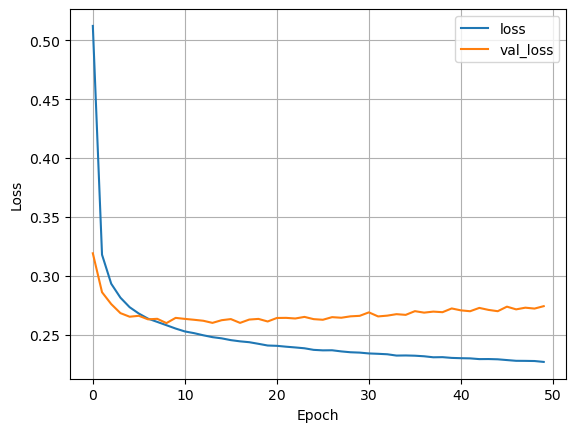

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [8]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color ='blue'
    else:
        color ='red'

    plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                                         100*np.max(predictions_array),
                                                         true_label),
               color=color)

In [10]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 1s 3ms/step


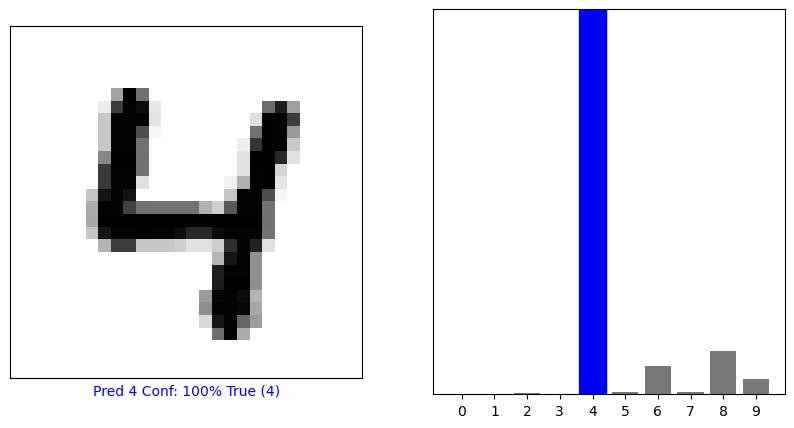

In [11]:
predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()